# Project overview

- Problem : Companies advertise online, click fraud can haapen.
    - Resulting in misleading click data and wasted money.
    - 3 billion clicks per day, of which 90% are potentially fradulent.
- Current Solution : measure the journey of a user's click across their portfolio, and flag IP addresses who produce lots of clicks. 
    - build IP blacklist and device blacklist.
- Challenge : build an algorithm that predicts whether a user will download an app after clicking a mobile app ad.

#### Goal : predict if a person after clicking a mobile app advertisement will download the app. The data is highly unbalanced with only 0.25% data of positive class.

## Hypothesis Framework

#### Current Hypothesis 
- __Hypothesis__ : IPs having % of Fradulent downloads = 100 % are possibly fradulent.
- __Prescriptive Action__ : Block the IPs
<br/><br/>
- __Hypothesis__ : IPs having % of Fradulent downloads > 80% are possibly fradulent.
- __Prescriptive Action__ : Temporarly hold the payment for the ad click and not charge the APP and investigate further, Block the IP
<br/><br/>

#### Big Hypothesis 
- __Hypothesis__ : Predict the likelihood of a click from an app being fradulent using the best predictive model
- __Prescriptive Action__ : If Likelyhood > Threshold 1 - Block the IPs
<br/><br/>
- __Hypothesis__ : Predict the likelihood of a click from an app being fradulent using the best predictive model developed in Kaggle. 
- __Prescriptive Action__ : If Likelyhood > Threshold 2. Temporarily hold the payment for the ad click and not charge the APP and investigate further 
- __What not to do yet__ : - Block the IP
<br/>

> __Talking Data can use the Fraud Detection predictive model to either blacklist the IPs, Apps,Devices or use the predictive model in real-time to prevent fraud when the transaction happens.__



#### Project Hypothesis 
- __Hypothesis__ : Predict the likelihood of a click from an app being fradulent using the best predictive model
- __Prescriptive Action__ : If Likelyhood > Threshold 1 - Block the IPs
<br/><br/>
- __Hypothesis__ : Predict the likelihood of a click from an app being fradulent using the best predictive model developed in Kaggle. If Likelyhood > Threshold 2
- __Prescriptive Action__ : Temporarily hold the payment for the ad click and not charge the APP and investigate further 
- __What not to do yet__ : - Block the IP
<br/>

## 1. File overview

- train.csv - the training set
- train_sample.csv - 100,000 randomly-selected rows of training data, to inspect data before downloading full set 
- test.csv - the test set
- sampleSubmission.csv - a sample submission file in the correct format 
- UPDATE: test_supplement.csv - This is a larger test set that was unintentionally released at the start of the competition. It is not necessary to use this data, but it is permitted to do so. The official test data is a subset of this data.

### Data fields
Each row of the training data contains a click record, with the following features.

- ip: ip address of click.
- app: app id for marketing.
- device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
        - 싼 디바이스에서 혹은 구버전 디바이스에서 가짜 클릭이 많지 않을까? 
- os: os version id of user mobile phone
        - 업데이트가 안된 버전에서 가짜 클릭이 많지 않을까?
- channel: channel id of mobile ad publisher
        - 반복되는 채널에서 노출될 수 있을까?
- click_time: timestamp of click (UTC) 
        - 특정 아이피의 클릭 회수가 일정 이상일때, 시간의 차이가 적을수록 가짜 클릭이지 않을까?
- attributed_time: if user download the app for after clicking an ad, this is the time of the app download
        - 데이터가 많이 없다 (제거하자)
- is_attributed: the target that is to be predicted, indicating the app was downloaded Note that ip, app, device, os, and channel are encoded. 
        - 0이면 다운로드를 안함 (다운로드에는 사기클릭이 속해져 있다.)
        - 1이면 다운로드를 함 (마케팅에 좋은 영향을 받음)

- 광고를 통해 들어왔는데 클릭을 안하는 경우는?

The test data is similar, with the following differences:

- click_id: reference for making predictions
- is_attributed: not included

#### 레퍼런스 정리

- 튜토리얼
    - Overall
        - https://www.kaggle.com/ryotasuzuki/play-with-dataset-roc-75
        - https://github.com/kimkartavyavimudh/Kaggle-TalkingData/blob/master/Exploration%2Bon%2BFull%2BSet.ipynb
    - EDA 
        - https://www.kaggle.com/gopisaran/indepth-eda-entire-talkingdata-dataset
        - https://www.kaggle.com/kz23szk/talking-data-eda-seen-from-the-purpose-of-fraud
    - visalizing
        - https://www.kaggle.com/avanwyk/talkingdata-data-exploration-and-class-weights
        - https://www.kaggle.com/gopisaran/indepth-eda-entire-talkingdata-dataset
    - feature engineering 
        - https://www.kaggle.com/nanomathias/feature-engineering-importance-testing

- 결과물 
    - 랜덤포레스트
        - https://www.kaggle.com/codeastar/random-forest-classification-on-talkingdata
    - Simple linear Stacking
        - https://www.kaggle.com/aharless/simple-linear-stacking-lb-9730
    - Deeplearning
        - https://www.kaggle.com/gowrishankarin/rnn-gru-4-layers-modified-nn-arch-of-kireev
        - https://www.kaggle.com/alexanderkireev/experiments-with-imbalance-nn-architecture/code
        - https://www.kaggle.com/aharless/talkingdata-gpu-example-with-multiple-runs
        - 
        

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline
import time
from subprocess import check_output

from sklearn.linear_model import LogisticRegression
from scipy.special import expit, logit
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix

In [3]:
pwd

'/Users/mac/Documents/GitHub/Kaggle_project/Fraud Detection'

In [4]:
data = pd.read_csv('../../../DEVELOPMENT/Fraud Detection/input/train_sample.csv',parse_dates=['click_time'])
data.dtypes

ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time         datetime64[ns]
attributed_time            object
is_attributed               int64
dtype: object

In [5]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [6]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,91255.880,12.048,21.771,22.818,268.832,0.002
std,69835.554,14.941,259.668,55.943,129.724,0.048
min,9.000,1.000,0.000,0.000,3.000,0.000
25%,40552.000,3.000,1.000,13.000,145.000,0.000
50%,79827.000,12.000,1.000,18.000,258.000,0.000
75%,118252.000,15.000,1.000,19.000,379.000,0.000
max,364757.000,551.000,3867.000,866.000,498.000,1.000


In [7]:
data.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000,227,100000.000
unique,nan,nan,nan,nan,nan,80350,227,nan
top,nan,nan,nan,nan,nan,2017-11-08 12:01:02,2017-11-09 03:52:48,nan
freq,nan,nan,nan,nan,nan,7,1,nan
first,nan,nan,nan,nan,nan,2017-11-06 16:00:00,NaN,nan
last,nan,nan,nan,nan,nan,2017-11-09 15:59:51,NaN,nan
mean,91255.880,12.048,21.771,22.818,268.832,NaN,NaN,0.002
std,69835.554,14.941,259.668,55.943,129.724,NaN,NaN,0.048
min,9.000,1.000,0.000,0.000,3.000,NaN,NaN,0.000
25%,40552.000,3.000,1.000,13.000,145.000,NaN,NaN,0.000


In [8]:
NAs = data.isnull().sum()
NAs

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

# 1. EDA

### 1-1. Visaulizing Y variable and X variable by IP(Primary Key) : 0.25%

/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,is_attributed,count
0,0,99773
1,1,227


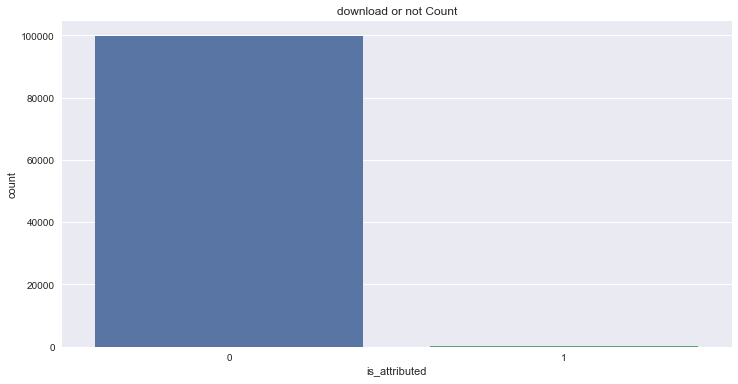

In [9]:
plt.figure(figsize=(12, 6))
click_count = data.groupby('is_attributed', as_index=False)['ip'].count()
click_count = click_count.rename(columns ={'ip':'count'})
sns.barplot(x='is_attributed', y='count', data= click_count);
plt.title('download or not Count');
click_count.head()

/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


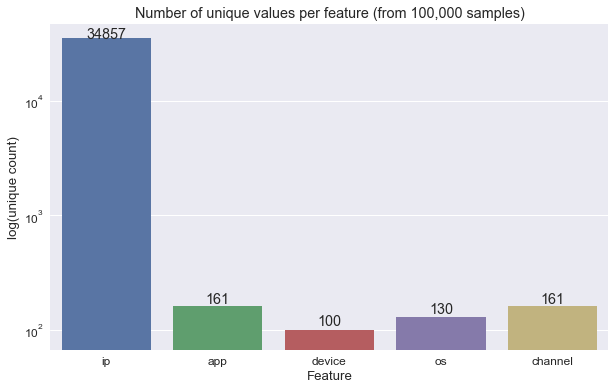

In [10]:
plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(data[col].unique()) for col in cols]

sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature (from 100,000 samples)');
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 10,
        uniq,
        ha="center") 

__counts not duplicate click, Number of sample is 227(all 0 : click is fraud)~34857(Some 0 : Click is fraud)__


### 1-2. Time variable and Download Click

In [11]:
#Change data types
data['day'] = data['click_time'].dt.day.astype('uint8')
data['hour'] = data['click_time'].dt.hour.astype('uint8')
data['minute'] = data['click_time'].dt.minute.astype('uint8')
data['second'] = data['click_time'].dt.second.astype('uint8')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,7,9,30,38
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,7,13,40,27
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,7,18,5,24
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,7,4,58,8
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,9,0,9


In [12]:
# Change time
data['click_time_dt']= pd.to_datetime(data['click_time'])
dt= data['click_time_dt'].dt
data['day'] = dt.day.astype('uint8')
data['hour'] = dt.hour.astype('uint8')
data['minute'] = dt.minute.astype('uint8')

In [13]:
dll_df = data[data['is_attributed'] == 1]
not_dll_df = data[data['is_attributed'] == 0]

/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


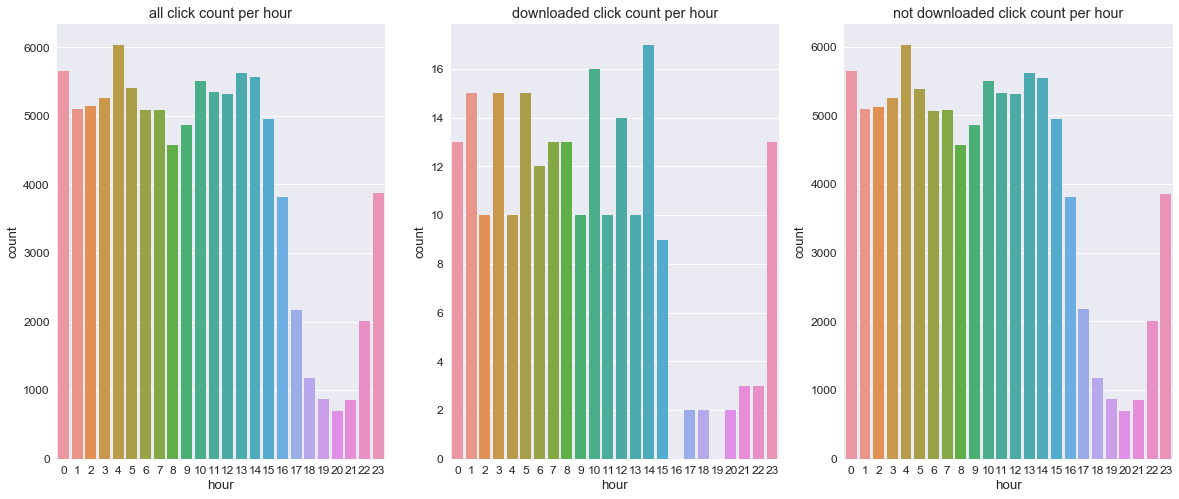

In [14]:
fig ,ax = plt.subplots(1, 3, figsize= (20, 8))

sns.countplot(x='hour', data=data, ax=ax[0]);
sns.countplot(x='hour', data=dll_df, order=[i for i in range(24)] , ax=ax[1]);
sns.countplot(x='hour', data=not_dll_df,  ax=ax[2]);
ax[0].set_title('all click count per hour');
ax[1].set_title('downloaded click count per hour');
ax[2].set_title('not downloaded click count per hour');

__ The number of clicks are commonly falling from 18 to 22 o'clock, but there is no big difference in the three graphs.__

In [15]:
count_per_hour = data.groupby('hour', as_index = False).count()
count_per_hour

,hour,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,minute,second,click_time_dt
0,0,5654,5654,5654,5654,5654,5654,13,5654,5654,5654,5654,5654
1,1,5103,5103,5103,5103,5103,5103,15,5103,5103,5103,5103,5103
2,2,5137,5137,5137,5137,5137,5137,10,5137,5137,5137,5137,5137
3,3,5264,5264,5264,5264,5264,5264,15,5264,5264,5264,5264,5264
4,4,6039,6039,6039,6039,6039,6039,10,6039,6039,6039,6039,6039
5,5,5400,5400,5400,5400,5400,5400,15,5400,5400,5400,5400,5400
6,6,5079,5079,5079,5079,5079,5079,12,5079,5079,5079,5079,5079
7,7,5089,5089,5089,5089,5089,5089,13,5089,5089,5089,5089,5089
8,8,4576,4576,4576,4576,4576,4576,13,4576,4576,4576,4576,4576
9,9,4867,4867,4867,4867,4867,4867,10,4867,4867,4867,4867,4867


### 1-3. Particular Time and Download Rate per Hour

In [15]:
count_per_hour = count_per_hour[['hour', 'app', 'attributed_time']]
count_per_hour.head()

,hour,app,attributed_time
0,0,5654,13
1,1,5103,15
2,2,5137,10
3,3,5264,15
4,4,6039,10


In [16]:
count_per_hour = count_per_hour.rename(columns = {'app': 'click_count', 'attributed_time': 'download_count'})
count_per_hour['download_rate'] = count_per_hour['download_count'] / count_per_hour['click_count'] * 100
count_per_hour.head()

,hour,click_count,download_count,download_rate
0,0,5654,13,0.230
1,1,5103,15,0.294
2,2,5137,10,0.195
3,3,5264,15,0.285
4,4,6039,10,0.166


/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


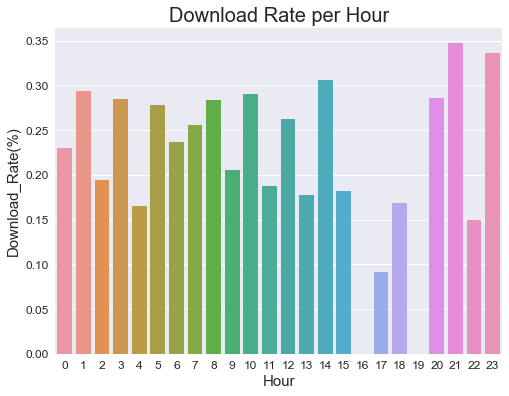

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='hour', y='download_rate', data=count_per_hour);
plt.ylabel('Download_Rate(%)', fontsize=15)
plt.xlabel('Hour', fontsize=15)
ax.set_title('Download Rate per Hour', fontsize = 20);

__ Because the download rate is too small, if one download column is added, the result will change dramatically.
If click frauder click on the computer automatically, clicks may have occurred every ten minutes.__

### 1-3. Particular Time and Download Rate per Min

In [18]:
data['minute_band'] = pd.cut(data['minute'], 6)
data['minute_band'].head()

0      (29.5, 39.333]
1    (39.333, 49.167]
2     (-0.059, 9.833]
3      (49.167, 59.0]
4     (-0.059, 9.833]
Name: minute_band, dtype: category
Categories (6, interval[float64]): [(-0.059, 9.833] < (9.833, 19.667] < (19.667, 29.5] < (29.5, 39.333] < (39.333, 49.167] < (49.167, 59.0]]

In [19]:
minute_df = data.groupby('minute_band', as_index=False).count().sort_values(by='minute_band', ascending=True) [['minute_band', 'ip']]
minute_df.head()

,minute_band,ip
0,"(-0.059, 9.833]",17238
1,"(9.833, 19.667]",16843
2,"(19.667, 29.5]",16663
3,"(29.5, 39.333]",16601
4,"(39.333, 49.167]",16366


In [20]:
rename_dict = {}
minute_band_name = ['0', '10', '20', '30', '40', '50']
for minute_band,col in zip(minute_band_name, minute_df['minute_band']):
    rename_dict[col] = minute_band

minute_df = minute_df.rename(index=rename_dict)

def rename_minute_band(s):
    return rename_dict[s]

minute_df ['minute_band']= minute_df['minute_band'].map(rename_minute_band)
minute_df.head()


,minute_band,ip
0,0,17238
1,10,16843
2,20,16663
3,30,16601
4,40,16366


/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


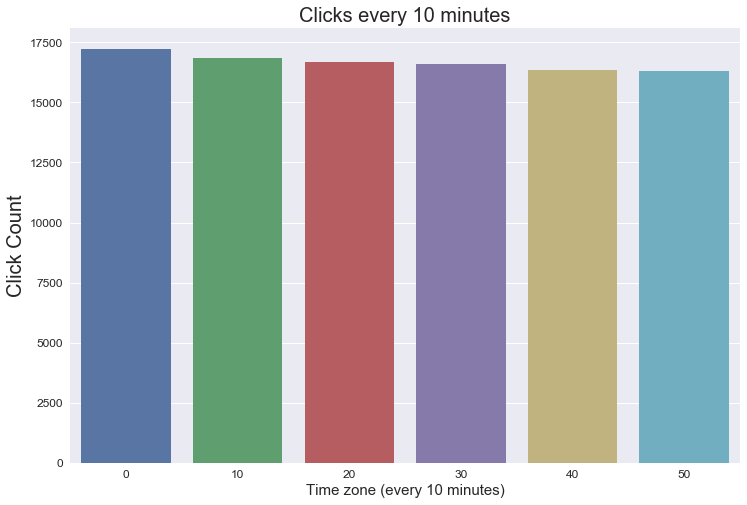

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='minute_band', y='ip' ,data=minute_df)
plt.title("Clicks every 10 minutes", fontsize =20)
plt.xlabel('Time zone (every 10 minutes)',fontsize=15)
plt.ylabel('Click Count',fontsize=20)
plt.show()

__We saw number of click per hour and 10 minutes, but no noticeable difference appeared.__

### 1-4. Correlation of each variable

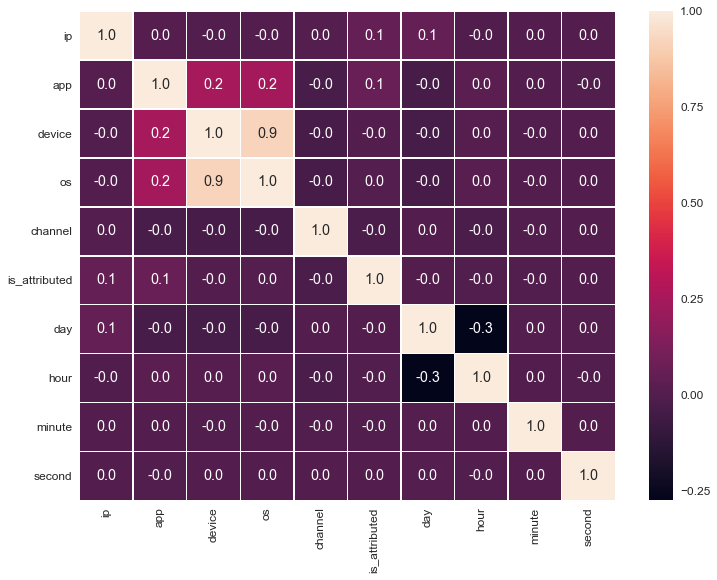

In [22]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

__ Device and OS has Strong correlation. However, Each variable is not related to Y_variable__

### 1-5. Correlation of each training and test set

## 2. Indepth EDA

- Did they click on a large number with the same ip address?
- Did they click on the same device, OS?
- If Developers of competing applications conduct click fraud, is the number of clicks increased with a specific application?
- If Ad network companies applications conduct click fraud, is the number of clicks increased with a specific channel?

### 2-1. Did they click on a large number with the same ip address?

#### 2-1-a. Check the ip address distribution

count   100000.000
mean     91255.880
std      69835.554
min          9.000
25%      40552.000
50%      79827.000
75%     118252.000
max     364757.000
Name: ip, dtype: float64


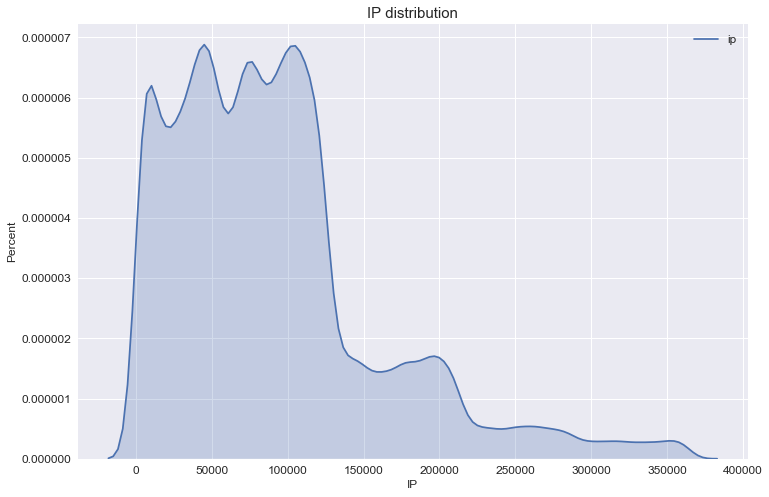

In [23]:
print(data['ip'].describe())
plt.figure(figsize=(12, 8))
sns.kdeplot(data['ip'], shade=True)
plt.title('IP distribution', fontsize = 15)
plt.xlabel('IP', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)
plt.show()

__It is concentrated around 0 to 10,000.But It is not possible to find meaning in the numerical value of ip address.__

#### 2-1-b. Count the number of each ip address.

In [24]:
click_ip_count = data.groupby('ip', as_index= False)['device'].aggregate('count').sort_values('device', ascending=False)
click_ip_count = click_ip_count.rename(columns={'device':'count'})
click_ip_count.head()

,ip,count
926,5348,669
918,5314,616
12833,73487,439
12839,73516,399
9385,53454,280


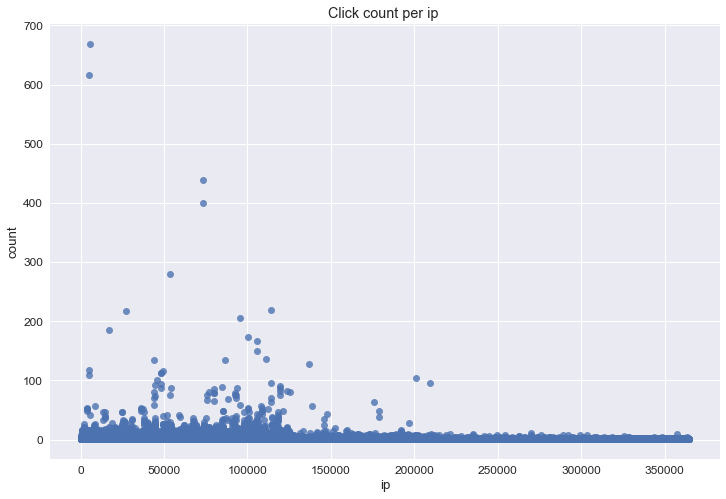

In [25]:
plt.figure(figsize=(12,8))
sns.regplot(x='ip', y='count', fit_reg=False, data=click_ip_count)
plt.title("Click count per ip ")
plt.show()

#### except the ip with 20 clicks or less.

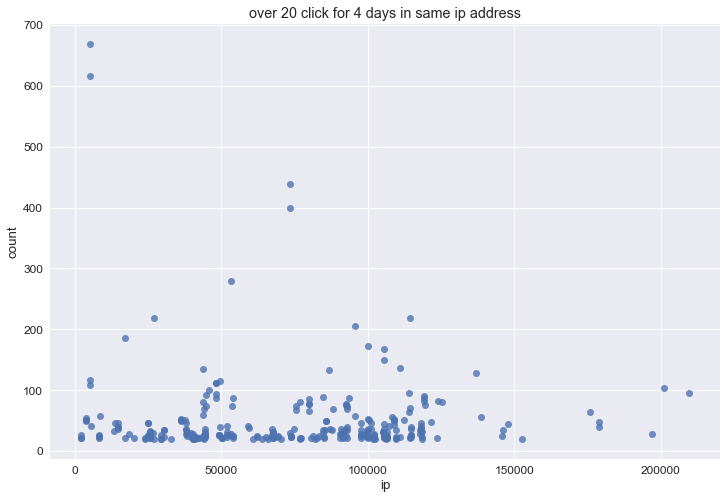

In [26]:
plt.figure(figsize=(12,8))
sns.regplot(x='ip', y='count', fit_reg=False, data=click_ip_count[click_ip_count['count']>19])
plt.title('over 20 click for 4 days in same ip address')
plt.show()

__This set is may be Fraud click data__

#### 2-1-c. Sorting large click_ip

In [27]:
ip_click_ranking = data.groupby('ip', as_index = False).count().sort_values(by = 'app', ascending=False)
ip_click_ranking = ip_click_ranking[['ip', 'app']]
ip_click_ranking = ip_click_ranking.rename(columns={'app':'click_count'})
ip_click_ranking.head(10)

,ip,click_count
926,5348,669
918,5314,616
12833,73487,439
12839,73516,399
9385,53454,280
20021,114276,219
4639,26995,218
16703,95766,205
2990,17149,186
17488,100275,173


#### 2-1-d. Check one IP 5348

/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


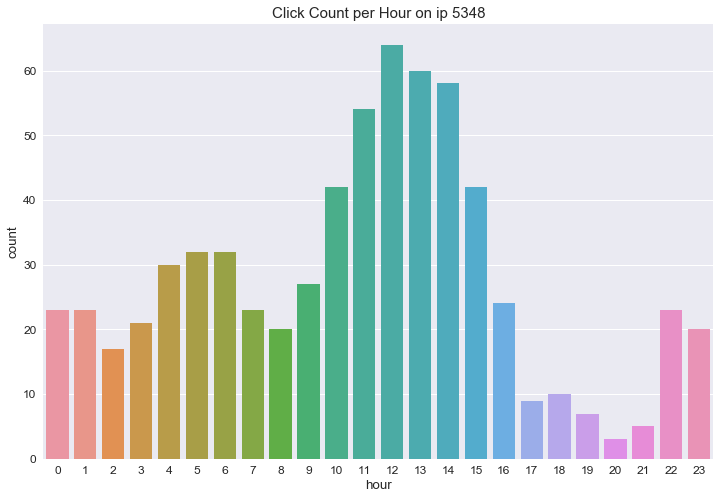

In [28]:
data[data['ip'] == 5348].sort_values(by='click_time', ascending=True).head(20)

plt.figure(figsize=(12,8))
sns.countplot(x='hour', data=data[data['ip'] == 5348]);
plt.title('Click Count per Hour on ip 5348', fontsize=15)
plt.show()

#### 2-1-e. Check the number of downloads of IP with many clicks.

In [29]:
ip_click_download = data.groupby('ip', as_index = False).sum().sort_values(by='app', ascending = False).reset_index()
ip_click_download = ip_click_download[['ip', 'app', 'is_attributed']]
ip_click_download = ip_click_download.rename(columns={'is_attributed': 'download_count', 'app': 'click_count'})

ip_click_download.head(30)

,ip,click_count,download_count
0,5314,10086,3
1,5348,9478,3
2,73487,4809,0
3,73516,4428,0
4,53454,3548,0
5,114276,3243,0
6,26995,3215,0
7,86767,3003,0
8,17149,2993,0
9,105475,2513,0


__IP address with many clicks has mostly 0 downloads. So IP address is effective for judging whether it is an illegal click. Check IP based on Click_count by download__
<br/>

IP 기준 클릭대비 다운로드 수가 적은 친구들을 제거해준다!

### 2-2. Did they click on the same device, OS?

#### 2-1-a. Click frauder may have many cheap device, and their device may be not updated. There are many possibilities to use a specific device, OS.

count   100000.000
mean        21.771
std        259.668
min          0.000
25%          1.000
50%          1.000
75%          1.000
max       3867.000
Name: device, dtype: float64


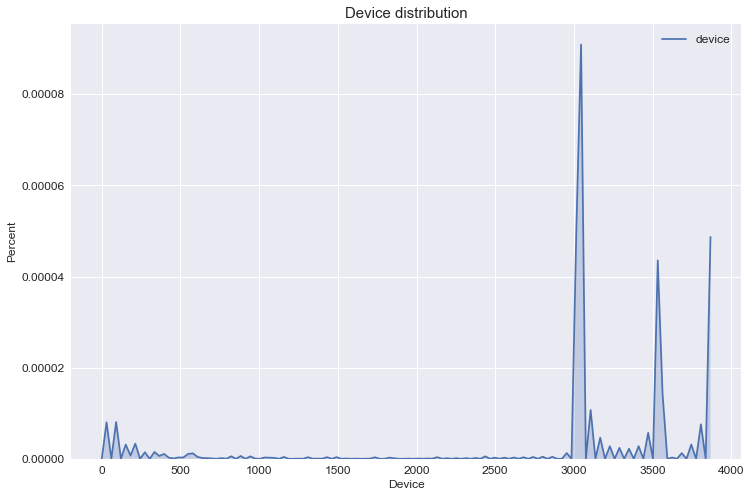

In [30]:
print(data['device'].describe())
plt.figure(figsize=(12, 8))
sns.kdeplot(data['device'], shade=True)
plt.title('Device distribution', fontsize = 15)
plt.xlabel('Device', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)
plt.show()

__We find that the click rate on a specific device is high.__

#### 2-1-b. Check high click rate on specific device is high

In [31]:
dll_cnt_device = data.groupby('device', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
dll_cnt_device = dll_cnt_device[['device', 'is_attributed']]
dll_cnt_device = dll_cnt_device.rename(columns={'is_attributed': 'download_count'})
dll_cnt_device.head()

,device,download_count
1,1,146
0,0,52
32,97,3
9,16,3
13,21,2


In [32]:
click_cnt_device = data.groupby('device', as_index=False).count().sort_values(by='app', ascending=False)
click_cnt_device = click_cnt_device[['device', 'app']]
click_cnt_device = click_cnt_device.rename(columns={'app': 'click_count'})
click_cnt_device.head()

,device,click_count
1,1,94338
2,2,4345
0,0,541
93,3032,371
96,3543,151


In [33]:
device_click_download_df = pd.merge(click_cnt_device, dll_cnt_device, on='device') 
device_click_download_df['download_rate'] = device_click_download_df['download_count']/ device_click_download_df['click_count'] * 100 
device_click_download_df.head()

,device,click_count,download_count,download_rate
0,1,94338,146,0.155
1,2,4345,2,0.046
2,0,541,52,9.612
3,3032,371,0,0.000
4,3543,151,0,0.000


/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


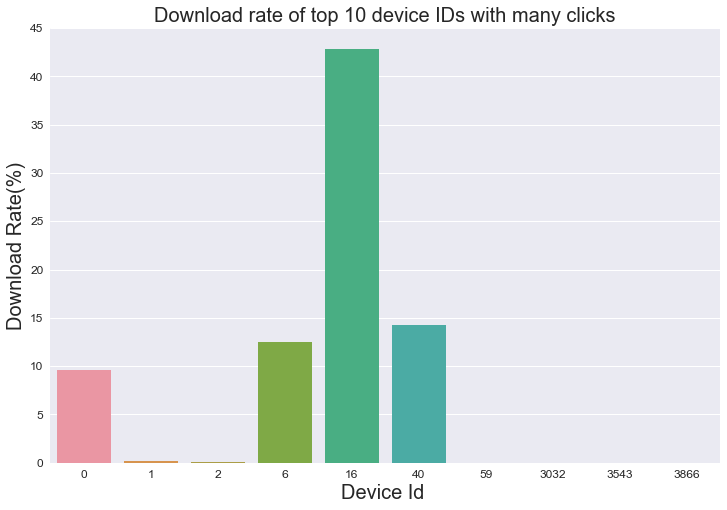

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x='device', y='download_rate', data=device_click_download_df[:10])
plt.xlabel("Device Id ", fontsize=20)
plt.ylabel("Download Rate(%)", fontsize=20)
plt.title("Download rate of top 10 device IDs with many clicks", fontsize=20)
plt.show()

In [35]:
device_click_download_df.head(10)

,device,click_count,download_count,download_rate
0,1,94338,146,0.155
1,2,4345,2,0.046
2,0,541,52,9.612
3,3032,371,0,0.000
4,3543,151,0,0.000
5,3866,93,0,0.000
6,59,12,0,0.000
7,6,8,1,12.500
8,40,7,1,14.286
9,16,7,3,42.857


__we can calculate Pr(download rate | large click device)___

#### 2-1-c. Check high click rate on specific OS is high

count   100000.000
mean        22.818
std         55.943
min          0.000
25%         13.000
50%         18.000
75%         19.000
max        866.000
Name: os, dtype: float64


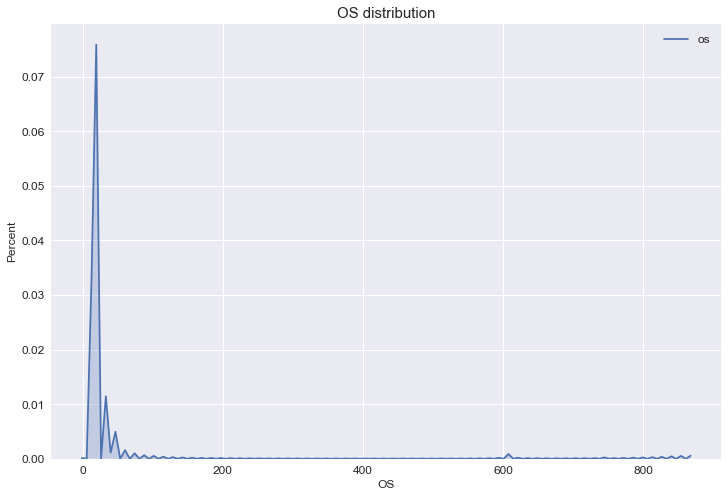

In [36]:
# 　check os distribution
print(data['os'].describe())
plt.figure(figsize=(12, 8))
sns.kdeplot(data['os'], shade=True)
plt.title('OS distribution', fontsize = 15)
plt.xlabel('OS', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)
plt.show()

In [37]:
dll_cnt_os = data.groupby('os', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
dll_cnt_os = dll_cnt_os[['os', 'is_attributed']]
dll_cnt_os = dll_cnt_os.rename(columns={'is_attributed': 'download_count'})

dll_cnt_os.head()

,os,download_count
19,19,41
0,0,26
24,24,26
13,13,25
29,29,11


In [38]:
click_cnt_os = data.groupby('os', as_index=False).count().sort_values(by='app', ascending=False)
click_cnt_os = click_cnt_os[['os', 'app']]
click_cnt_os = click_cnt_os.rename(columns={'app': 'click_count'})
click_cnt_os.head()

,os,click_count
19,19,23870
13,13,21223
17,17,5232
18,18,4830
22,22,4039


In [39]:
os_click_download_df = pd.merge(click_cnt_os, dll_cnt_os, on='os') 
os_click_download_df['download_rate'] = os_click_download_df['download_count']/ os_click_download_df['click_count'] * 100 
os_click_download_df.head(10)

,os,click_count,download_count,download_rate
0,19,23870,41,0.172
1,13,21223,25,0.118
2,17,5232,6,0.115
3,18,4830,4,0.083
4,22,4039,6,0.149
5,10,2816,3,0.107
6,8,2775,0,0.000
7,6,2520,2,0.079
8,15,2396,4,0.167
9,20,2347,3,0.128


/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


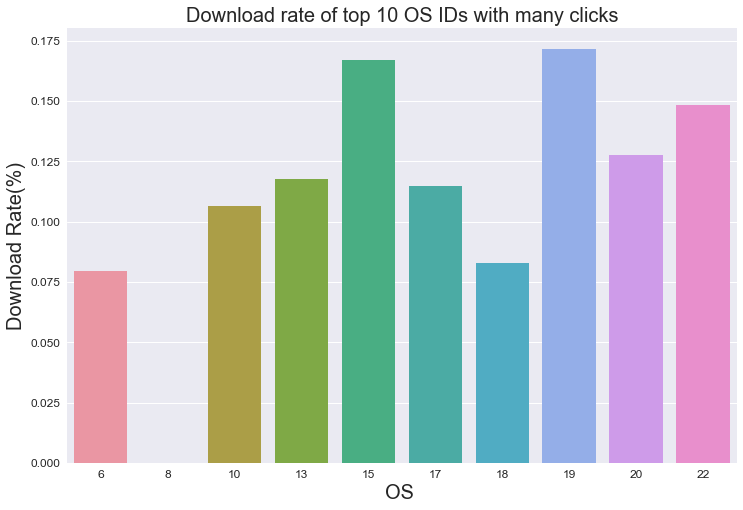

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x='os', y='download_rate', data=os_click_download_df[:10])
plt.xlabel("OS ", fontsize=20)
plt.ylabel("Download Rate(%)", fontsize=20)
plt.title("Download rate of top 10 OS IDs with many clicks", fontsize=20)
plt.show()

### 2-3. is the number of clicks increased with a specific application?
#### 2-4-a .let's see the number of clicks for each application.

In [41]:
click_ip_count = data.groupby('app', as_index= False)['device'].aggregate('count').sort_values('device', ascending=False)
click_ip_count = click_ip_count.rename(columns={'device':'count'})
click_ip_count = click_ip_count[click_ip_count['count'] > 100]
click_ip_count.head()

,app,count
2,3,18279
11,12,13198
1,2,11737
8,9,8992
14,15,8595


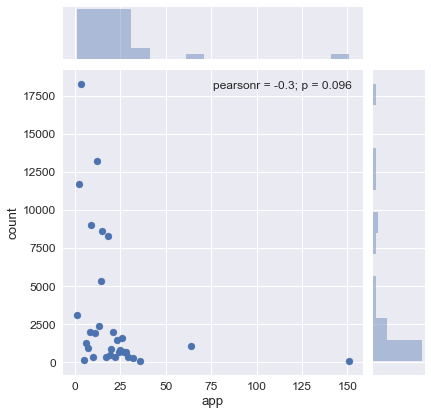

In [42]:
plt.figure(figsize=(12,8))
sns.jointplot('app', 'count', data=click_ip_count)
plt.show()

__There are extremely clicked apps. These apps is fraud click target__

### 2-4. If Ad network companies applications conduct click fraud, is the number of clicks increased with a specific channel?

#### 2-4-a .the number of clicks per channel.

In [43]:
#  check chennel distribution
print(data['channel'].describe())

count   100000.000
mean       268.832
std        129.724
min          3.000
25%        145.000
50%        258.000
75%        379.000
max        498.000
Name: channel, dtype: float64


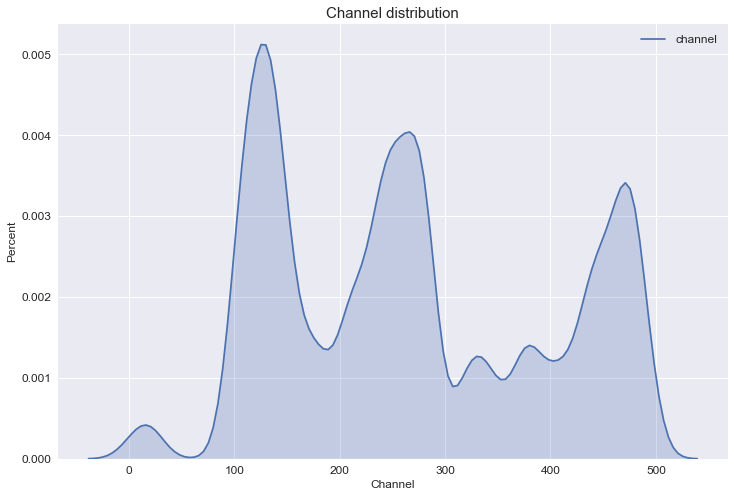

In [44]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data['channel'], shade=True)
plt.title('Channel distribution', fontsize = 15)
plt.xlabel('Channel', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)
plt.show()

__There are many clicks on a specific channel, but this may be just a large frequency of advertisements.__

#### 2-4-b .Check top ten channel

In [45]:
click_cnt_channel = data.groupby('channel', as_index=False).count().sort_values(by='app', ascending=False)
click_cnt_channel = click_cnt_channel[['channel', 'app']]
click_cnt_channel = click_cnt_channel.rename(columns={'app': 'click_count'})

click_cnt_channel.head(10)

,channel,click_count
77,280,8114
64,245,4802
14,107,4543
146,477,3960
33,134,3224
67,259,3130
70,265,3013
40,153,2954
45,178,2936
24,121,2472


/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


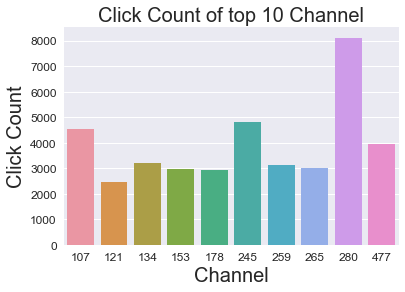

In [46]:
sns.barplot(x='channel', y='click_count', data=click_cnt_channel.sort_values(by='click_count', ascending=False)[:10])
plt.xlabel("Channel", fontsize=20)
plt.ylabel("Click Count", fontsize=20)
plt.title("Click Count of top 10 Channel", fontsize=20)
plt.show()

#### 2-4-c .Check download rate of this top ten channels with many clicks.

In [47]:
dll_cnt_channel = data.groupby('channel', as_index=False).sum().sort_values(by='is_attributed', ascending=False)
dll_cnt_channel = dll_cnt_channel[['channel', 'is_attributed']]
dll_cnt_channel = dll_cnt_channel.rename(columns={'is_attributed': 'download_count'})
dll_cnt_channel.head()

,channel,download_count
53,213,72
18,113,31
8,21,19
12,101,13
74,274,12


In [48]:
channel_click_download_df = pd.merge(click_cnt_channel, dll_cnt_channel, on='channel') 
channel_click_download_df['download_rate'] = channel_click_download_df['download_count']/ channel_click_download_df['click_count'] * 100 
channel_click_download_df.head(10)

,channel,click_count,download_count,download_rate
0,280,8114,2,0.025
1,245,4802,0,0.000
2,107,4543,1,0.022
3,477,3960,0,0.000
4,134,3224,1,0.031
5,259,3130,0,0.000
6,265,3013,2,0.066
7,153,2954,0,0.000
8,178,2936,0,0.000
9,121,2472,1,0.040


/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


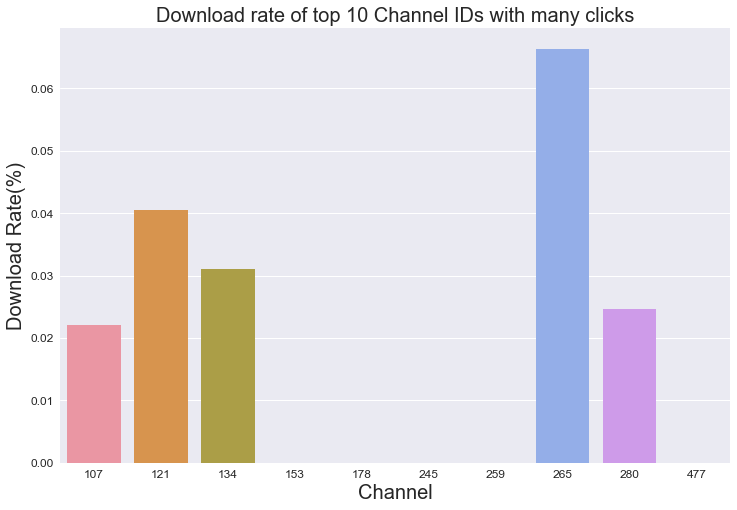

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x='channel', y='download_rate', data=channel_click_download_df[:10])
plt.xlabel("Channel", fontsize=20)
plt.ylabel("Download Rate(%)", fontsize=20)
plt.title("Download rate of top 10 Channel IDs with many clicks", fontsize=20)
plt.show()

In [50]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,click_time_dt,minute_band
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,7,9,30,38,2017-11-07 09:30:38,"(29.5, 39.333]"
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,7,13,40,27,2017-11-07 13:40:27,"(39.333, 49.167]"
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,7,18,5,24,2017-11-07 18:05:24,"(-0.059, 9.833]"
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,7,4,58,8,2017-11-07 04:58:08,"(49.167, 59.0]"
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,9,0,9,2017-11-09 09:00:09,"(-0.059, 9.833]"


In [51]:
#What I cannot find meaningful result
data = data.drop('attributed_time', axis = 1)
data = data.drop('click_time_dt', axis = 1)
data = data.drop('minute_band', axis = 1)
data.head()

,ip,app,device,os,channel,click_time,is_attributed,day,hour,minute,second
0,87540,12,1,13,497,2017-11-07 09:30:38,0,7,9,30,38
1,105560,25,1,17,259,2017-11-07 13:40:27,0,7,13,40,27
2,101424,12,1,19,212,2017-11-07 18:05:24,0,7,18,5,24
3,94584,13,1,13,477,2017-11-07 04:58:08,0,7,4,58,8
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,0,9


In [56]:
Y = data['is_attributed']
X = data.drop(['is_attributed','click_time'], axis = 1)
X_train = X

## 3. Feature Engineering & Important testing

- My thought is that some ips, apps, devices, might have higher frequencies of is_attributed, and wish to add that information.

> Calculating the following "attribute rates"
$$
\begin{equation}
\text{P}\,\text{(is_attributed}\,\,|\,\,\text{category)}
\end{equation}
$$
The danger of this is that if a given category-combination has very few clicks, then the statistical significance of above equations cannot be trusted. Therefore, make weighting the rates
$$
\begin{equation}
    \text{conf}_{\text{is_attributed}} = \frac{\log(\text{views}_{\text{category_1}})}{\log(100000)}
\end{equation}
$$


#### where the value 100000 has been chosen arbitrarily to such that if a given category has 1000 views, then it gets a confidence weight of 60%, if it has 100 views then onfly a confidence weight of 40% etc.





In [436]:
ATTRIBUTION_CATEGORIES = [        
    # V1 Features #
    ['ip'], ['app'], ['device'], ['os'], ['channel'],
    
    # V2 Features #
    ['app', 'channel'],
    ['app', 'os'],
    ['app', 'device'],
    
    # V3 Features #
    ['channel', 'os'],
    ['channel', 'device'],
    ['os', 'device']
]